# Matplotlib version and modules

In [4]:
import pkgutil as pu
import numpy as np
import matplotlib as mpl
import scipy as sp
import pandas as pd
import pydoc

print("Matplotlib version", mpl.__version__)

def clean(astr):
   s = astr
   # remove multiple spaces
   s = ' '.join(s.split())
   s = s.replace('=','')

   return s

def print_desc(prefix, pkg_path):
   for pkg in pu.iter_modules(path=pkg_path):
      name = prefix + "." + pkg[1]

      if pkg[2] == True:
         try:
            docstr = pydoc.plain(pydoc.render_doc(name))
            docstr = clean(docstr)
            start = docstr.find("DESCRIPTION")
            docstr = docstr[start: start + 140]
            print(name, docstr)
         except:
            continue

print("\n")
print_desc("matplotlib", mpl.__path__)

Matplotlib version 2.0.0


matplotlib.axes 
matplotlib.backends 
matplotlib.compat 
matplotlib.delaunay DESCRIPTION :Author: Robert Kern <robert.kern@gmail.com> :Copyright: Copyright 2005 Robert Kern. :License: BSD-style license. See LICENSE.tx
matplotlib.projections 
matplotlib.sphinxext 
matplotlib.style 
matplotlib.testing 
matplotlib.tri 


# Basic matplotlib plot

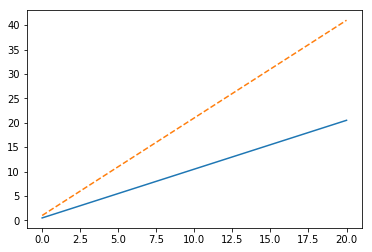

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 20)

plt.plot(x,  .5 + x)
plt.plot(x, 1 + 2 * x, '--')
plt.show()

# Logarithmic plot

Poly [  3.61559210e-01  -7.05783195e+02]


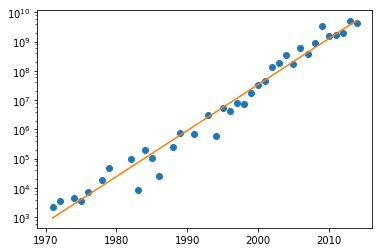

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)
years = df.index.values
counts = df['trans_count'].values
poly = np.polyfit(years, np.log(counts), deg=1)
print("Poly", poly)
plt.semilogy(years, counts, 'o')
plt.semilogy(years, np.exp(np.polyval(poly, years)))
plt.show()

## Scatter Plots

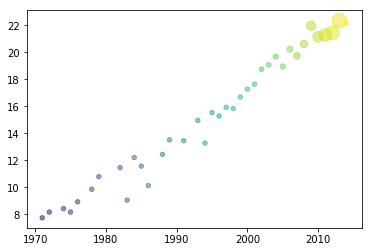

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)
years = df.index.values
counts = df['trans_count'].values
gpu_counts = df['gpu_trans_count'].values
cnt_log = np.log(counts)
plt.scatter(years, cnt_log, c= 200 * years, s=20 + 200 * gpu_counts/gpu_counts.max(), alpha=0.5)
plt.show()

# Legends and annotaions

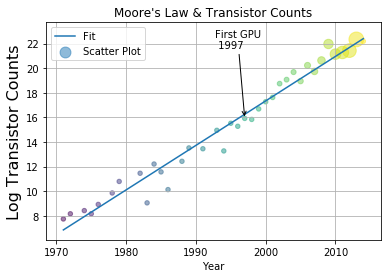

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)
gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)
years = df.index.values
counts = df['trans_count'].values
gpu_counts = df['gpu_trans_count'].values

poly = np.polyfit(years, np.log(counts), deg=1)
plt.plot(years, np.polyval(poly, years), label='Fit')

gpu_start = gpu.index.values.min()
y_ann = np.log(df.at[gpu_start, 'trans_count'])
ann_str = "First GPU\n %d" % gpu_start
plt.annotate(ann_str, xy=(gpu_start, y_ann), arrowprops=dict(arrowstyle="->"), xytext=(-30, +70), textcoords='offset points')

cnt_log = np.log(counts)
plt.scatter(years, cnt_log, c= 200 * years, s=20 + 200 * gpu_counts/gpu_counts.max(), alpha=0.5, label="Scatter Plot")
plt.legend(loc='upper left')
plt.grid()
plt.xlabel("Year")
plt.ylabel("Log Transistor Counts", fontsize=16)
plt.title("Moore's Law & Transistor Counts")
plt.show()

# Three-dimensional plots

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log


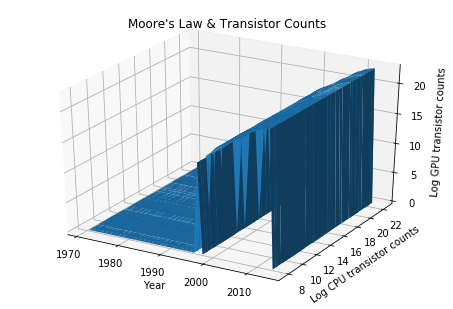

In [11]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)
gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)

fig = plt.figure()
ax = Axes3D(fig)
X = df.index.values

#Y = np.log(df['trans_count'].values)
Y = np.where(df['trans_count'].values>0, np.log(df['trans_count'].values), 0)
X, Y = np.meshgrid(X, Y)
#Z = np.log(df['gpu_trans_count'].values)
Z = np.where(df['gpu_trans_count'].values>0, np.log(df['gpu_trans_count'].values), 0)

ax.plot_surface(X, Y, Z)
ax.set_xlabel('Year')
ax.set_ylabel('Log CPU transistor counts')
ax.set_zlabel('Log GPU transistor counts')
ax.set_title("Moore's Law & Transistor Counts")
plt.show()

# plotting in pandas

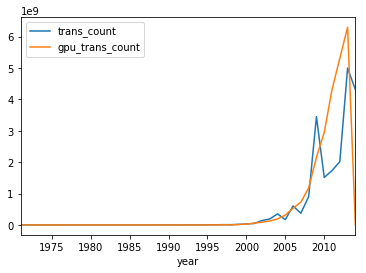

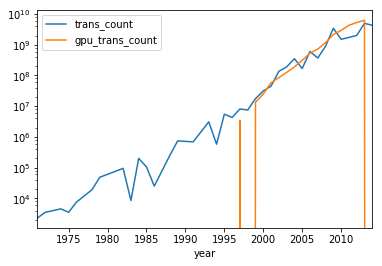

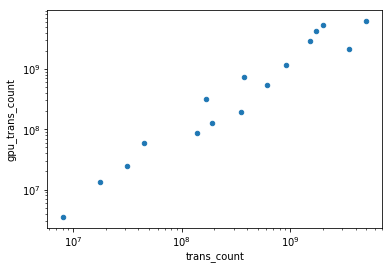

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, 
right_index=True)
df = df.replace(np.nan, 0)
df.plot()
df.plot(logy=True)
df[df['gpu_trans_count'] > 0].plot(kind='scatter', 
x='trans_count', y='gpu_trans_count', loglog=True)
plt.show()

# Lag plots

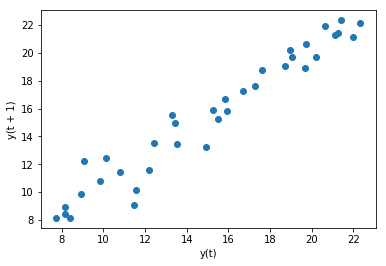

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.tools.plotting import lag_plot

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)
lag_plot(np.log(df['trans_count']))
plt.show()

# autocorrelation plots

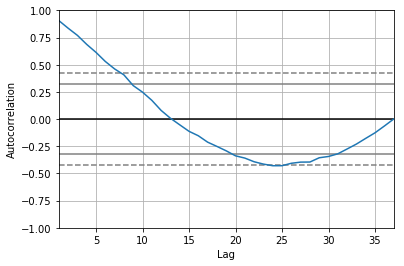

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)
autocorrelation_plot(np.log(df['trans_count']))
plt.show()